In [16]:
import os
import glob
import sys
import vtk

import pandas as pd    
import numpy as np
import matplotlib.pyplot as plt
from vtk.util.numpy_support import vtk_to_numpy

In [17]:
#Include depicted data...
#Case 2 -------------------------- Diameter import
data_Wave= pd.read_csv("../BenzResults/Case_Liu/Wave_Case2.csv", header=None) # Wave_Case2.csv
data_TAB= pd.read_csv("../BenzResults/Case_Liu/TAB_Case2.csv", header=None) # TAB_Case2.csv
data_PDPA= pd.read_csv("../BenzResults/Case_Liu/PDPA_Case2.csv", header=None) # PDPA_Case2.csv

#Case 3 -------------------------- Diameter import
TAB_Case3= pd.read_csv("../BenzResults/Case_Liu/TAB_Case3.csv", header=None) # TAB_Case3.csv
KH_Case3= pd.read_csv("../BenzResults/Case_Liu/Wave_Case3.csv", header=None) # SMD_KH_Case3Experiment.csv
PDPA_Case3= pd.read_csv("../BenzResults/Case_Liu/PDPA_Case3.csv", header=None) # PDPA_Case3.csv

#Case 4 -------------------------- Single droplet breakup
data_C4_SingleD= pd.read_csv("../BenzResults/Case_Liu/Case_4_Single_D.csv", header=None) # Case_4_Single_D.csv
data_C4_SingleRe= pd.read_csv("../BenzResults/Case_Liu/Case4_Single_Re.csv", header=None) # Case4_Single_Re.csv

#Case 4 -------------------------- ReD import
data_Wave= pd.read_csv("../BenzResults/Case_Liu/Wave_Case2.csv", header=None) # Wave_Case2.csv
ReX= pd.read_csv("../BenzResults/Case_Liu/Trajectories/ReX.csv", header=None) 

#Case 2 ------------------------ Trajectory import
TAB_amp00_Traject_Case2= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case2_TAB_amp0_0.csv", header=None) # Trajectory_TAB_Case2.csv
Wave_Traject_Case2= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case2_wave_Dynamic.csv", header=None) # Trajectory_Wave_Case2.csv
Wave_st_Traject_Case2= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case2_Wave_Standard.csv", header=None) # Trajectory_Wave_Case2.csv
Traject_Exp_Case2= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case2_Experiment.csv", header=None) # Trajectory_Experiment_Case2.csv

#Case 4 -------------------------- Trajectory import
TAB_amp02_Traject_Case4= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case4_TAB_amp0_2.csv", header=None) # TAB_Traject_Case4.csv
TAB_amp00_Traject_Case4= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case4_TAB_amp0_0.csv", header=None) # TAB_sc_Traject_Case4.csv
Wave_st_Traject_Case4= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case4_Wave_Standard.csv", header=None) # Trajectory_Wave_Case4.csv
Wave_Traject_Case4= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case4_Wave_Dynamic.csv", header=None) # Trajectory_Wave_Case4.csv
Traject_Exp_Case4= pd.read_csv("../BenzResults/Case_Liu/Trajectories/Case4_Experiment.csv", header=None) # Trajectory_Experiment_Case4.csv

In [18]:
fdir = "./VTK/lagrangian/sprayCloud"
#check if directory exists
if not os.path.exists(fdir):
    print('Error: Path does not exist:', fdir)
    sys.exit()

In [19]:
nd = 1
# create reader
reader = vtk.vtkXMLPolyDataReader()
# -------------------------------------------------------------------
points =[]
point_data=[]
point_d = []
point_d0 = []; sigma=[]; density=[]; dyn_viscosity=[];Reynolds=[];
#loop over all vtp files
for fname in sorted(glob.glob(os.path.join(fdir, '*.vtp'))):
    print('Reading:', fname)
    reader.SetFileName(fname)
    reader.Update()

    data = (reader.GetOutput())
    point_data.append(data.GetPointData())
    point_d.append(vtk_to_numpy((data.GetPointData()).GetArray('d'))[nd-1:nd])
    point_d0.append(vtk_to_numpy((data.GetPointData()).GetArray('d0'))[nd-1:nd])    
    sigma.append(vtk_to_numpy((data.GetPointData()).GetArray('sigma'))[nd-1:nd])
    dyn_viscosity.append(vtk_to_numpy((data.GetPointData()).GetArray('mu'))[nd-1:nd])
    density.append(vtk_to_numpy((data.GetPointData()).GetArray('rho'))[nd-1:nd])
    Reynolds.append(vtk_to_numpy((data.GetPointData()).GetArray('Re'))[nd-1:nd])
    points.append((vtk_to_numpy(data.GetPoints().GetData()))[nd-1:nd])

Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5125.vtp
Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5140.vtp
Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5155.vtp
Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5170.vtp
Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5185.vtp
Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5200.vtp
Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5215.vtp
Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5230.vtp
Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5245.vtp
Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5260.vtp
Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5275.vtp
Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5290.vtp
Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5305.vtp
Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5320.vtp
Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5335.vtp
Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5350.vtp
Reading: ./VTK/lagrangian/sprayCloud/sprayCloud_5365.vtp
Reading: ./VTK/lagrangian/spray

In [20]:
print(point_d)

[array([0.00016907], dtype=float32), array([0.00015668], dtype=float32), array([0.00014159], dtype=float32), array([0.00012423], dtype=float32), array([0.00010516], dtype=float32), array([8.58624e-05], dtype=float32), array([6.9543e-05], dtype=float32), array([5.72547e-05], dtype=float32), array([4.95693e-05], dtype=float32), array([4.61302e-05], dtype=float32), array([4.50588e-05], dtype=float32), array([4.48552e-05], dtype=float32), array([4.48552e-05], dtype=float32), array([4.48552e-05], dtype=float32), array([4.48552e-05], dtype=float32), array([4.48552e-05], dtype=float32), array([4.48552e-05], dtype=float32), array([4.48552e-05], dtype=float32), array([4.48552e-05], dtype=float32), array([4.48552e-05], dtype=float32), array([4.48552e-05], dtype=float32), array([4.48552e-05], dtype=float32), array([4.48552e-05], dtype=float32), array([4.48552e-05], dtype=float32), array([4.48552e-05], dtype=float32), array([4.48552e-05], dtype=float32), array([4.48552e-05], dtype=float32), array(

In [21]:
px=[]
py=[]
pz=[]
for i in range(0, len(points)):
    px.append(np.array(points[i][:,0]))
    py.append(np.array(points[i][:,1]))
    pz.append(np.array(points[i][:,2]))

In [22]:
diameter =[]
for i in range(0, len(points)):
    diameter.append(np.array(point_d[i]))   
    diameter = [arr for arr in diameter if arr.size > 0]


In [23]:
diameter_total = np.concatenate( diameter, axis=0 )
px_total = np.concatenate( px, axis=0 )
py_total = np.concatenate( py, axis=0 )
pz_total = np.concatenate( pz, axis=0 )

c = np.column_stack((py_total, pz_total, diameter_total))
c_sorted = c[np.argsort(c[:, 0])]

In [24]:
# Computing the Sauter mean diameter for a specific amount of segments
d3 = pow(c_sorted[:,2],3)
sigma_d3 = sum(d3)
d2 = pow(c_sorted[:,2],2)
sigma_d2 = sum(d2)
 
splitedSize = round(len(c_sorted[:,2])/60)
d3_split = [d3[x:x+splitedSize] for x in range(0, len(d3), splitedSize)]
d2_split = [d2[x:x+splitedSize] for x in range(0, len(d2), splitedSize)]
d_avgsplit = [c_sorted[:,2][x:x+splitedSize] for x in range(0, len(c_sorted[:,2]), splitedSize)]
c_shortx  = [c_sorted[:,0][x:x+splitedSize] for x in range(0, len(c_sorted[:,0]), splitedSize)]
c_shorty  = [c_sorted[:,1][x:x+splitedSize] for x in range(0, len(c_sorted[:,1]), splitedSize)]


In [25]:
d32=[];c_avgx =[];c_avgy =[];d_avg =[]

for i in range(0, len(c_shortx)):
    d32.append(sum(d3_split[i])/sum(d2_split[i]))
    c_avgx.append(sum(c_shortx[i])/(len(c_shortx[i])))
    c_avgy.append(sum(c_shorty[i])/(len(c_shorty[i])))
    d_avg.append(sum(d_avgsplit[i])/(len(d_avgsplit[i])))

In [26]:
print(d_avg)

[0.00016287449398078024, 0.0001329099977738224, 9.550920003675856e-05, 6.339884930639528e-05, 4.784974953508936e-05, 4.495699977269396e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-05, 4.4855198211735114e-

(0.042, 0.056)

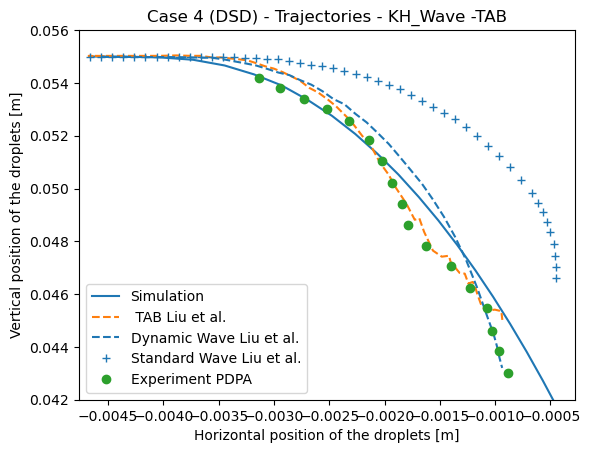

In [30]:
######################################
#####*********Tarjectory*********#####
######################################

#plt.plot(c_sorted[:,0],c_sorted[:,1], label='Simulation')
plt.plot(c_avgx,c_avgy, label='Simulation')
plt.plot(TAB_amp00_Traject_Case4.iloc[:,0], TAB_amp00_Traject_Case4.iloc[:,1], '--',label=' TAB Liu et al.')
plt.plot(Wave_Traject_Case4.iloc[:,0], Wave_Traject_Case4.iloc[:,1], '--',color='C0',label='Dynamic Wave Liu et al.')
plt.plot(Wave_st_Traject_Case4.iloc[:,0], Wave_st_Traject_Case4.iloc[:,1], '+',color='C0',label='Standard Wave Liu et al.')
plt.plot(Traject_Exp_Case4.iloc[:,0], Traject_Exp_Case4.iloc[:,1], 'o',label='Experiment PDPA')
plt.legend()
plt.title('Case 4 (DSD) - Trajectories - KH_Wave -TAB')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Vertical position of the droplets [m]')
# plt.xlim(-0.0047625, 0.00002375)
plt.xlim(-0.0047625, -0.00027625)
plt.ylim(0.042,0.056)

(-0.0047625, 0.0002375)

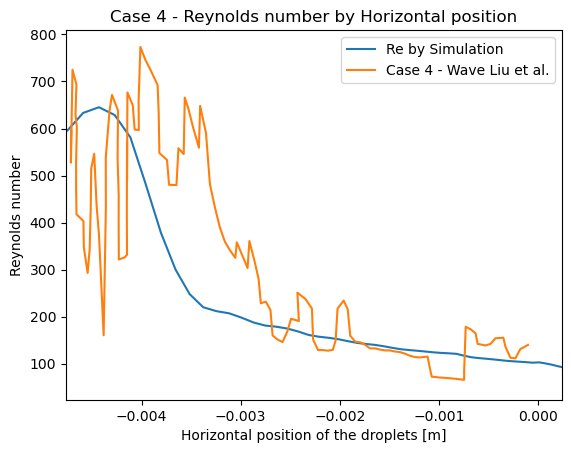

In [28]:
######################################
#####*********Re  Case4**********#####
######################################

Reynolds = [arr for arr in Reynolds if arr.size > 0]
plt.plot(c_sorted[:,0], Reynolds, label='Re by Simulation')
plt.plot(ReX.iloc[:,0],ReX.iloc[:,1], '-', label='Case 4 - Wave Liu et al.')
plt.legend()
plt.title('Case 4 - Reynolds number by Horizontal position')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Reynolds number')
plt.xlim(-0.0047625,0.0002375)

(-0.0047625, 0.0002375)

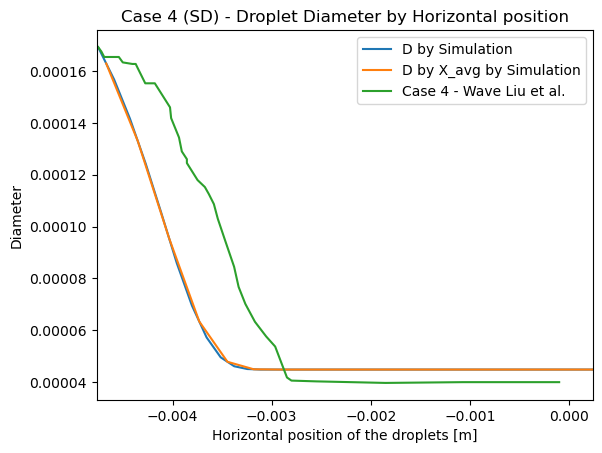

In [29]:
######################################
#####*********Re  Case4**********#####
######################################

plt.plot(c_sorted[:,0], c_sorted[:,2], label='D by Simulation')
plt.plot(c_avgx,d_avg, label='D by X_avg by Simulation')
# plt.plot(c_sorted[:,0],c_sorted[:,2],label='KH current work')
plt.plot(data_C4_SingleD.iloc[:,0]-0.0047625,data_C4_SingleD.iloc[:,1]/1e6, '-', label='Case 4 - Wave Liu et al.')
plt.legend()
plt.title('Case 4 (SD) - Droplet Diameter by Horizontal position')
plt.xlabel('Horizontal position of the droplets [m]')
plt.ylabel('Diameter')
plt.xlim(-0.0047625,0.0002375)